# Расчет тензора инерции для кельтского камня

In [158]:
import numpy as np
import scipy
import sympy as sm
import matplotlib.pyplot as plt
plt.rcParams["text.latex.preamble"]=r"\usepackage{amsmath}"
plt.rcParams['text.usetex'] = True
from mpl_toolkits.mplot3d import axes3d 

# чтобы работала 3D-крутилка
%matplotlib ipympl  

# Работа с физическими величинами
%load_ext PhysicalQuantities.ipython
from PhysicalQuantities import q, QA 

# Надо когда-нибудь попробовать и распространение ошибки, но тут это явно лишнее.
#from uncertainties import ufloat
#from uncertainties.umath import *

# Точность
%precision 1

The PhysicalQuantities.ipython extension is already loaded. To reload it, use:
  %reload_ext PhysicalQuantities.ipython


'%.1f'

In [161]:
m = 1 kg
l = 2 mm
l2 = l*l
Ps = np.array([[l2, 2*l2], 
               [3*l2, 4*l2]]) * m * 2/5
Ps[0,0]

1.6 mm^2 $\text{kg}$

In [168]:
Ps.unit, Ps[0,0].unit, Ps[0,0]

# to('mm**2*kg')

(<PhysicalUnit kg>, <PhysicalUnit kg>, 1.6 mm^2 kg)

In [169]:
Ps[0,0]

0.0 $\text{m}^{2}$

In [133]:
QA

PhysicalQuantities.quantityarray.PhysicalQuantityArray

![](pics/rb-sizes-and-weight.svg)

In [2]:
import sympy as sm

In [90]:
Длина = 95.6mm
Ширина = 17.7mm
Высота = 10.9mm
Вес = 11g 

Длина, Ширина, Высота, Вес

(95.6 mm, 17.7 mm, 10.9 mm, 11 g)

In [91]:
Длина.autoscale, Ширина.autoscale, Вес.autoscale

(9.6 cm, 1.8 cm, 11.0 g)

![](pics/rb-for-volume-density.svg)

In [96]:
Вес_с_водой = 479g
Вес_без_воды = 251g
Вес_с_водой_и_камнями = 501g
Высота_без_камней = 70.5mm
Высота_c_камнями = 75.7mm
Диаметр_стакана = 71.1mm

Объем_камней = np.pi * Диаметр_стакана**2 / 4 * (Высота_c_камнями - Высота_без_камней)
#Объем_воды = np.pi * Диаметр_стакана**2 / 4 * Высота_без_камней
Плотность_камней = (Вес_с_водой_и_камнями - Вес_с_водой) / Объем_камней

Плотность_камней.base, Плотность_камней, Плотность_камней.autoscale
# Странно работает autoscale, возможно надо обсудить с авторами.

(1065.6 kg/m^3, 0.0 g/mm^3, 0.0 g/mm^3)

In [93]:

#Плотность_воды = (Вес_с_водой - Вес_без_воды) / Объем_воды
Плотность_камней.to("kg/m**3") #, Плотность_воды.to("kg/m**3")
# Грубо, но в порядок плотностей пластиков попадает.


1065.6 $\frac{\text{kg}}{\text{m}^3}$

#Полуось $x_a$ в сантиметрах:

In [6]:
a = Длина.to('cm').value/2
a 

4.8

Полуось x_b в сантиметрах:

In [7]:
b = Ширина.to('cm').value/2
b

0.9

Полуось x_с в сантиметрах:

In [8]:
c = Высота.to('cm').value/2
c

0.5

Плотность «кг/м^3»

In [9]:
density = Плотность_камней.to("kg/m**3").value
density

1065.6

## Моделирование «кельтского камня» формой полуэллипсоида

### Вывод формул инерции для простых тел с помощью sympy


Что-то я завалил задачу про момент инерции полушара. Решу-ка я ее с sympy (потом бы ее с sympy mechanics)

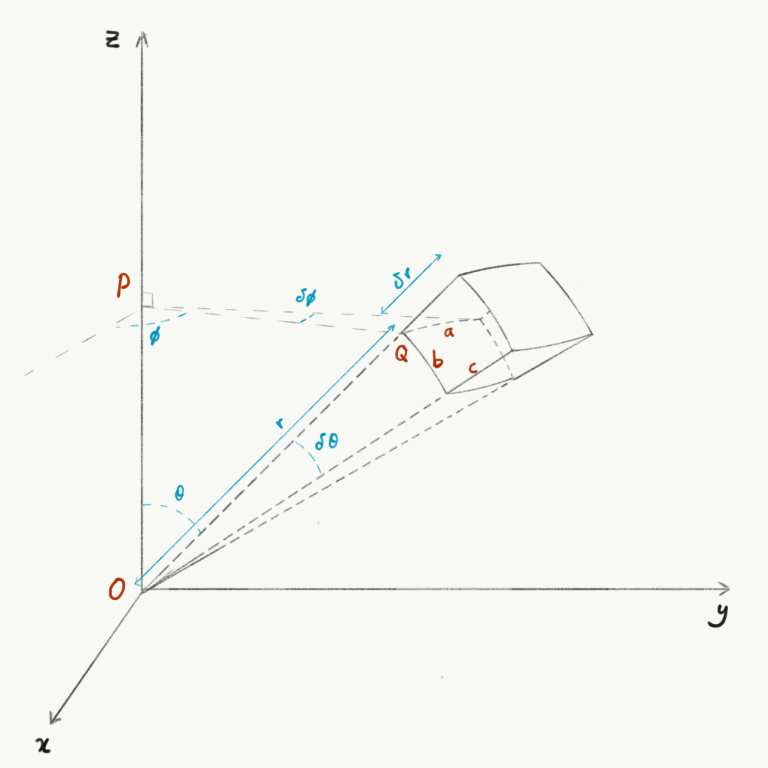

$$  a = PQ \delta \phi $$
$$  b = r \delta \theta $$
$$  c = \delta r $$

Элементарный объем
$$
   \delta V \approx a × b × c \approx r \sin \theta \delta \phi × r \delta \theta × \delta r \approx r^2 \sin \theta \delta \phi \theta \delta r
$$


In [18]:
m, x, y, r, theta, phi, R = sm.symbols('m x y r theta phi R')
элементарный_объем = r ** 2 * sm.sin(phi)

объем_полушара = sm.integrate(элементарный_объем, 
                                (r,     0, R), 
                                (phi,   0, sm.pi), 
                                (theta, 0, sm.pi))
объем_полушара
                            


2*pi*R**3/3

In [19]:
плотность_шара = m / объем_полушара
# покрутим вокруг оси y
радиус_вращения = r * sm.sin(phi)

момент_инерции_полушара = sm.integrate( радиус_вращения**2 * плотность_шара * элементарный_объем, 
                                (r,     0, R), 
                                (phi,   0, sm.pi), 
                                (theta, 0, sm.pi))

момент_инерции_полушара

2*R**2*m/5

In [12]:

сдвиг_центра_масс = sm.integrate( x * sm.pi * (R**2 - x**2), (x, 0, R)) / объем_полушара
расстояние_от_точки_подвеса_до_центра_масс = sm.sqrt(сдвиг_центра_масс**2 + R**2)
момент_инерции_относительно_оси_шара = момент_инерции_полушара              #2 * m * R**2 / 5    # попробовать вывести
момент_инерции_относительно_центра_масс = момент_инерции_относительно_оси_шара - m * сдвиг_центра_масс**2
момент_инерции_относительно_подвеса = момент_инерции_относительно_центра_масс + m * расстояние_от_точки_подвеса_до_центра_масс**2 
момент_инерции_относительно_подвеса


7*R**2*m/5

In [20]:
#тоже самое, сдвинув систему отсчета вниз.
сдвиг_центра_масс = sm.integrate( x* sm.pi * x**2, (x, 0, R)) / объем_полушара
расстояние_от_точки_подвеса_до_центра_масс = sm.sqrt( (R-сдвиг_центра_масс)**2 + R**2)
момент_инерции_относительно_оси_шара = 2 * m * R**2 / 5    # попробовать вывести
момент_инерции_относительно_центра_масс = момент_инерции_относительно_оси_шара - m * (R-сдвиг_центра_масс)**2
момент_инерции_относительно_подвеса = момент_инерции_относительно_центра_масс + m * расстояние_от_точки_подвеса_до_центра_масс**2 
момент_инерции_относительно_подвеса

7*R**2*m/5

In [101]:
def момент_инерции_эллипсоида():
    a, b, c = sm.symbols('a, b, c')
    m, x, y, r, theta, phi, R = sm.symbols('m x y r theta phi R')
    ra = a * r
    rb = b * r 
    rc = c * r
    x = ra * sm.cos(phi) * sm.sin(phi)
    y = rb * sm.sin(phi) * sm.sin(theta)
    z = rc * sm.cos(theta)
    элементарный_объем = ra * rb * c * sm.sin(phi) 
    объем_полуэллипсоида = sm.integrate(элементарный_объем, 
                                (r,     0, 1), 
                                (phi,   0, sm.pi), 
                                (theta, 0, sm.pi))    
    
    плотность = m / объем_полуэллипсоида
    момент_инерции_полуэллипсоида = sm.integrate( (rb * rc * sm.sin(phi) ) * плотность * элементарный_объем, 
                                (r,     0, 1), 
                                (phi,   0, sm.pi), 
                                (theta, 0, sm.pi))
    # момент_инерции_полуэллипсоида — пока получилось неверно, с этим надо разбираться глубоко, и непонятно, оценят ли в этой работе.

    return объем_полуэллипсоида, None

    ...

момент_инерции_эллипсоида()    

(2*pi*a*b*c/3, None)

In [135]:


import PhysicalQuantities.numpywrapper as nw



In [140]:
def свойства_инерции_полуэллипсоида():
    плотность = Плотность_камней
    a = Длина
    b = Ширина
    c = Высота
    масса_полуэллипсоида = 2 * np.pi * a * b * c * плотность / 3
    # Используем известную формулу для матрицы инерции полуэллипсоида
    I_1 = np.array([
        [b**2 + c**2, 0, 0],      
        [0,  a**2+c**2,  0],      
        [0,  0,  a**2 + b**2],      
    ]) * масса_полуэллипсоида * 2 /5 
    return масса_полуэллипсоида, I_1

m, I = свойства_инерции_полуэллипсоида()
m, I



(41.2 g,
 [[7114.6 mm^2 0.0 0.0]
  [0.0 152437.4 mm^2 0.0]
  [0.0 0.0 155639.6 mm^2]] g)

In [154]:
Ps[0,0]

1.0 kg $\frac{\text{m}}{\text{s}}$

In [147]:
I[0, 0].value  #.to('kg**m**2').value

7114.6 $\text{mm}^{2}$

In [118]:
угол_отклонения_груза = 30 deg 
рычаг_отклонения_груза = 3 cm
масса_добавленного_груза = 2 g



In [119]:
def свойства_инерции_добавленного_груза():
    плотность = Плотность_камней

    I_xx = 2 * масса_добавленного_груза *  ( рычаг_отклонения_груза * np.sin(угол_отклонения_груза) )**2
    I_yy = 2 * масса_добавленного_груза *  ( рычаг_отклонения_груза * np.cos(угол_отклонения_груза) )**2
    I_xy = - масса_добавленного_груза *  ( рычаг_отклонения_груза**2) * np.sin(2 * угол_отклонения_груза) 

    I_r = np.array([
            [I_xx, I_xy, 0],      
            [I_xy, I_yy,  0],      
            [0,  0, I_xx + I_yy],      
        ]) 



    return I_r

свойства_инерции_добавленного_груза()


array([[9.0 g*cm^2, -15.6 g*cm^2, 0],
       [-15.6 g*cm^2, 27.0 g*cm^2, 0],
       [0, 0, 36.0 g*cm^2]], dtype=object)

In [138]:
I[0,0]

NameError: name 'I' is not defined

In [126]:
def текст_для_тензора(I_, заголовок):
    '''
    Вспомогательная функция, делает латех-код с заголовком по нумпай матрице.
    '''
    I = I_
    try:
        I = I_.value
    except:
        pass    
    латех_для_матрицы = ''
    латех_строки_матрицы = []
    for i in range(I.shape[0]):
        латех_строка_матрицы = ' & '.join([f'{ I[i, j].base.value :.5f}' for j in range(I.shape[1])])
        латех_строки_матрицы.append(латех_строка_матрицы) 
    латех_для_матрицы = rf'''
        $\hspace*{{1cm}}\text{{ {заголовок} }} \small \begin{{bmatrix}} \frac{{kg*m^2}}{{10^6}} \end{{bmatrix}} \\ \normalsize \hspace*{{2cm}} \begin{{bmatrix}} ''' + r' \\ '.join(латех_строки_матрицы) + rf''' \end{{bmatrix}} $        ''' 
    return латех_для_матрицы   

In [16]:
def функция_эллипсоида(a, b, c, r, u, v):
    x = a * r * np.outer(np.cos(u), np.sin(v))
    y = b * r * np.outer(np.sin(u), np.sin(v))
    z = c * r * np.outer(np.ones_like(u), np.cos(v))
    return x, y, z
    


AttributeError: 'float' object has no attribute 'base'

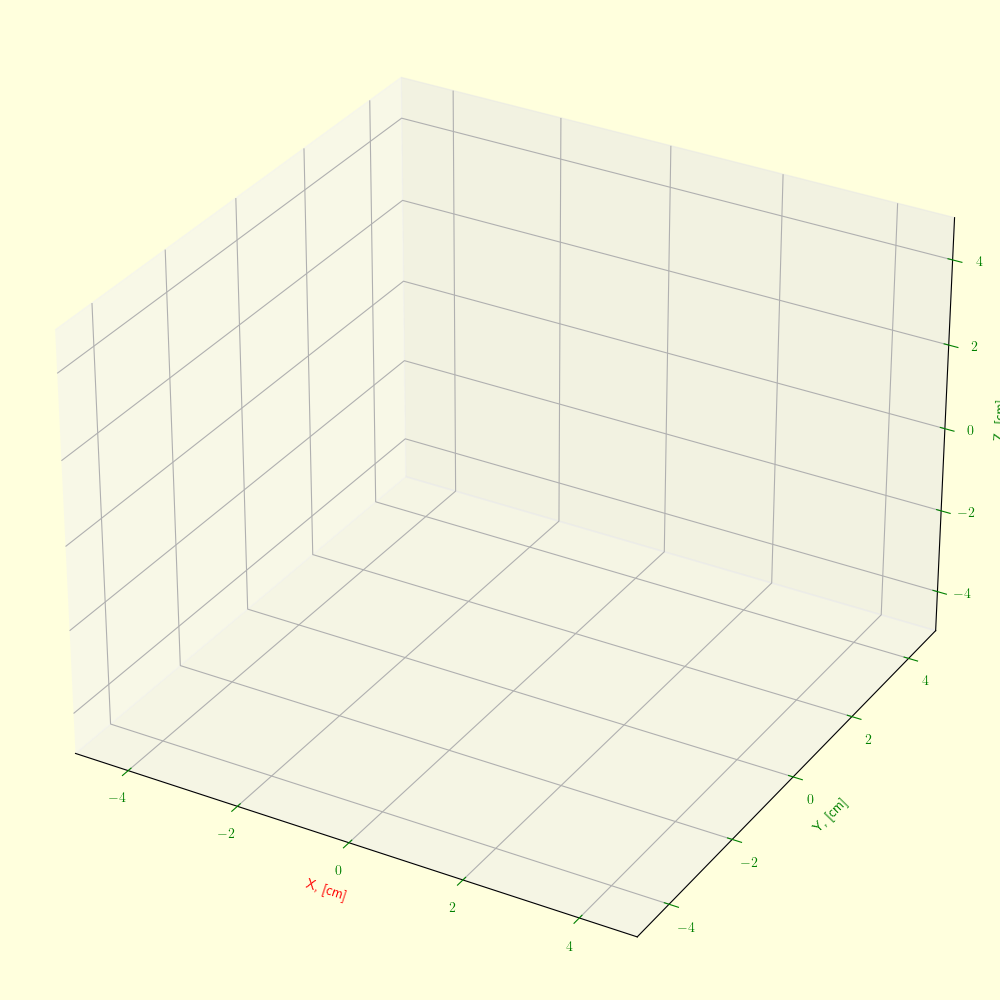

In [129]:
def моделируем_камень_полуэллипсоидом_со_сдвигом_массы():
        _, I_1 = свойства_инерции_полуэллипсоида()
        I_r = свойства_инерции_добавленного_груза()

        def параметрическая_кривая_для_эллипсоида(u, v):
            # Параметрическая кривая для эллипсоида https://stackoverflow.com/questions/7819498/plotting-ellipsoid-with-matplotlib    
            # np.outer — для ускорения генерации сетки точек
            x = a * np.outer(np.cos(u), np.sin(v))
            y = b * np.outer(np.sin(u), np.sin(v))
            z = c * np.outer(np.ones_like(u), np.cos(v))
            return x, y, z

        def текст_на_графике(x, y, text):
            ax.text2D(x, y, text, transform=ax.transAxes, 
                    fontsize=15, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

        fig = plt.figure(figsize=(10,10))
        ax = fig.add_subplot(1,1,1, projection='3d',  position=[0, 0, 1, 1])
        ax.set_facecolor('#ffffdd')
        ax.grid(color='green')

        ax.set_xlabel('X, [cm]', color='red')
        ax.set_ylabel('Y, [cm]', color='green')
        ax.set_zlabel('Z, [cm]', color='green')

        # возьмем по длине камня
        предел = a 
        ax.set_xlim([-предел, предел])
        ax.set_ylim([-предел, предел])
        ax.set_zlim([-предел, предел])
        
        ax.tick_params(colors='green')

        # русский в надписях сходу не заработал, надо возится с шаблонами латеха.
        текст_на_графике(0, 1, текст_для_тензора(I_1, 'Tensor of Inertia'))
        текст_на_графике(0.7, 1, текст_для_тензора(I_r, 'Inertia Tensor R'))

        точек_в_поверхности = 5
        # угол по YAW-плоскости
        u = np.linspace(0, 2 * np.pi, точек_в_поверхности)
        # угол по нижней полусфере
        v = np.linspace(np.pi/2, np.pi, точек_в_поверхности)

        x, y, z = параметрическая_кривая_для_эллипсоида(u, v)
        ax.plot_surface(x, y, z, color='white', edgecolor='green', zorder = 0.5)
        z_крышка_эллипсоида = np.zeros_like(z)

        ax.plot_surface(x, y, z_крышка_эллипсоида, color = 'white', zorder = 1)

        #рисуем стрелки осей
        ax.quiver(-предел, -предел, -предел, предел, 0, 0, color='red', alpha=1, lw=3, zorder = 10000) 
        ax.quiver(-предел, -предел, -предел, 0, предел, 0, color='green', alpha=1, lw=3)  
        ax.quiver(-предел, -предел, -предел, 0, 0, предел, color='blue', alpha=1, lw=3)

моделируем_камень_полуэллипсоидом_со_сдвигом_массы()